<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:white;font-family:Verdana,sans-serif;font-size:16px;">
<h2>Data evaluation template</h2>
In this Jupyter notebook, we commence by extracting all evaluations from the .csv file provided by Generali Seguros. Our primary task is to modify this .csv file to create a DataFrame. In this DataFrame, each row corresponds to a single file, featuring 24 items labeled as 'component_x'. Additionally, we conduct a brief analysis of the ratios of '1's both in the global dataset and on a component-by-component basis. 

In [41]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

In [3]:
def transform_df(df_sheet):
    
    columns_to_drop = ['Interlocutor', 'Unnamed: 1']

    # Drop the specified columns
    df_sheet = df_sheet.drop(columns=columns_to_drop)
    # Drop the specified row (index 0)
    df_sheet = df_sheet.drop(index=0)
    df_subset = df_sheet.loc[0:30]
    transposed_df_sheet = df_subset.T
    transposed_df_sheet=transposed_df_sheet.reset_index(drop=True)
    columns_to_drop = [2, 5, 8, 19, 26]
    transposed_df_sheet=transposed_df_sheet.drop(columns=columns_to_drop)
    transposed_df_sheet.shape
    # Rename columns using the list
    columns_list_sheet = ['File', 'component_1', 'component_2', 'component_3',
                           'component_4', 'component_5', 'component_6', 'component_7',
                           'component_8', 'component_9', 'component_10', 'component_11',
                           'component_12', 'component_13', 'component_14', 'component_15',
                           'component_16', 'component_17', 'component_18', 'component_19',
                           'component_20', 'component_21', 'component_22', 'component_23', 'component_24']
    transposed_df_sheet.columns = columns_list_sheet
    return transposed_df_sheet

In [10]:
# Read sheets by index (0-based)
sheets_to_read = [0, 1]
dfjulio = pd.read_excel("Valoració_Julio.xlsx", sheet_name=sheets_to_read)
df_sheet0_j = dfjulio[0]
df_sheet1_j = dfjulio[1]
df_sheet0_j = transform_df(df_sheet0_j)
df_sheet1_j = transform_df(df_sheet1_j)
dfsep = pd.read_excel("Valoració_Septiembre.xlsx", sheet_name=sheets_to_read)
df_sheet0_s = dfsep[0]
df_sheet1_s = dfsep[1]
df_sheet0_s = transform_df(df_sheet0_s)
df_sheet1_s = transform_df(df_sheet1_s)

In [40]:
# Concatenate all dataframes in one step
all_dataframes = [df_sheet0_j, df_sheet0_s, df_sheet1_j, df_sheet1_s]
final_concatenated_df = pd.concat(all_dataframes, axis=0)

# Reset the index for the final dataframe
final_concatenated_df = final_concatenated_df.reset_index(drop=True)

Filter to get only the files we already have the calls

In [42]:
# Path to the directory
directory_path = 'all_samples'

# List all files in the directory without their extensions
file_names_without_extension = [os.path.splitext(file)[0] for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

print(len(file_names_without_extension))

filtered_df = final_concatenated_df[final_concatenated_df['File'].isin(file_names_without_extension)]

88


In [36]:
# Calculate the ratio of 1s to 0s for all features combined
all_values = pd.concat([filtered_df[col] for col in filtered_df.columns if col.startswith('component_')])
ratio_all = all_values.mean()  # For binary data, mean is the ratio of 1s

print("Ratio of 1s to all values collectively:", ratio_all)

Ratio of 1s to all values collectively: 0.7902462121212122


Ratios for each feature individually:
{'component_1': 0.9204545454545454, 'component_2': 0.6704545454545454, 'component_3': 0.7386363636363636, 'component_4': 0.5113636363636364, 'component_5': 1.0, 'component_6': 0.9318181818181818, 'component_7': 0.8295454545454546, 'component_8': 0.9318181818181818, 'component_9': 0.9090909090909091, 'component_10': 0.7272727272727273, 'component_11': 0.8863636363636364, 'component_12': 0.9090909090909091, 'component_13': 0.75, 'component_14': 0.7045454545454546, 'component_15': 0.8295454545454546, 'component_16': 0.8295454545454546, 'component_17': 0.38636363636363635, 'component_18': 0.8409090909090909, 'component_19': 0.8977272727272727, 'component_20': 0.9090909090909091, 'component_21': 0.7840909090909091, 'component_22': 0.5795454545454546, 'component_23': 0.7045454545454546, 'component_24': 0.7840909090909091}


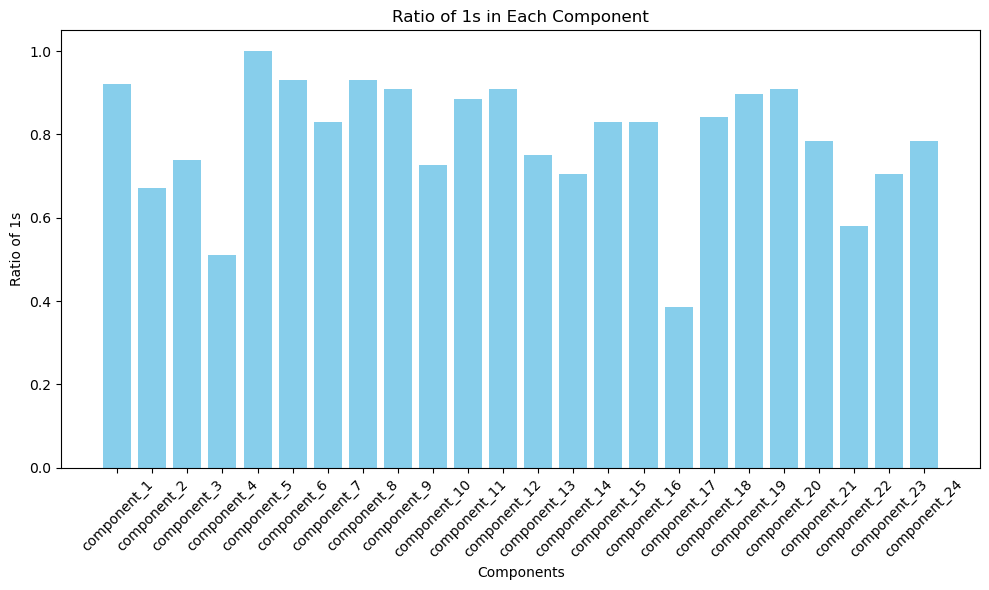

In [53]:
# Calculate the ratio of 1s to 0s for each feature individually
ratios_individual = {column: filtered_df[column].mean() for column in filtered_df.columns if column.startswith('component_')}
x_positions = range(len(ratios_individual))

print("Ratios for each feature individually:")
print(ratios_individual)
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_positions, list(ratios_individual.values()), align='center', color='skyblue')
# Set the x-axis ticks and labels
plt.xticks(x_positions, list(ratios_individual.keys()), rotation=45)
plt.xlabel('Components')
plt.ylabel('Ratio of 1s')
plt.title('Ratio of 1s in Each Component')
plt.tight_layout()
# Saving the plot as an image file
plt.savefig('ratio_of_1s_components.png')
plt.show()
